# Chapter 14: Deep Computer Vision using CNNs

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [3]:
# Load sample images

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

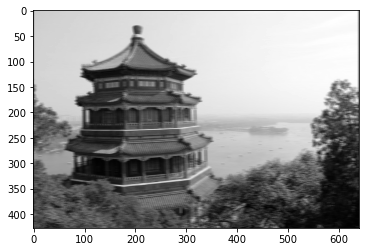

In [4]:
#create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters,  strides=1, padding='SAME')

plt.imshow(outputs[0, :, :, 1], cmap='gray')

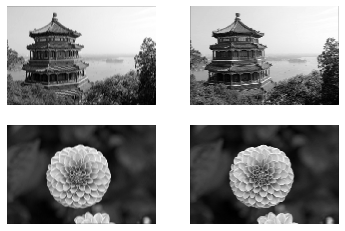

In [5]:
for image_index in range(len(images)):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + feature_map_index+1, )
        plot_image(outputs[image_index, :, :, feature_map_index])

# Convolutional in Keras

In [6]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='SAME', activation='relu')

In [7]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

# Fashion MNIST with CNN

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [9]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [10]:
from functools import partial

In [11]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding='SAME')

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

In [13]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))
# score = model.evaluate(X_test, y_test)
# X_new = X_test[:3]
# y_pred = model.predict(X_new)

# Using pre trained models

In [14]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 19s 0us/step


In [20]:
images_resized = tf.image.resize(images, [224, 224])

inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [21]:
Y_proba = model.predict(inputs)

In [22]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
top_K

40960/35363 [==================================] - 0s 1us/step


[[('n02825657', 'bell_cote', 0.8234871),
  ('n03877845', 'palace', 0.067516565),
  ('n03781244', 'monastery', 0.041883424)],
 [('n03530642', 'honeycomb', 0.49828234),
  ('n13040303', 'stinkhorn', 0.33955026),
  ('n02206856', 'bee', 0.043463837)]]

In [27]:
for image_index in range(len(images)):
    print(f'Image #{image_index}')
    for class_id, name, y_proba in top_K[image_index]:
        print(f'{class_id} - {name:12s} {y_proba*100:.2f}%')

Image #0
n02825657 - bell_cote    82.35%
n03877845 - palace       6.75%
n03781244 - monastery    4.19%
Image #1
n03530642 - honeycomb    49.83%
n13040303 - stinkhorn    33.96%
n02206856 - bee          4.35%


# Using pretrained models for transfer learning

In [28]:
import tensorflow_dataset as tfds

ModuleNotFoundError: No module named 'tensorflow_dataset'

# Classification and Localization